In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from scipy.stats import mannwhitneyu as mwu

#### Gene set sizes in different databases

In [3]:
gene_set_sizes=None
for dname in ['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']:
    data=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname,sep=',',header=0,index_col=0)
    data=pd.DataFrame(data['Set'].value_counts())
    data['Name']=data.index
    data['Database']=dname
    gene_set_sizes=pd.concat([gene_set_sizes,data])

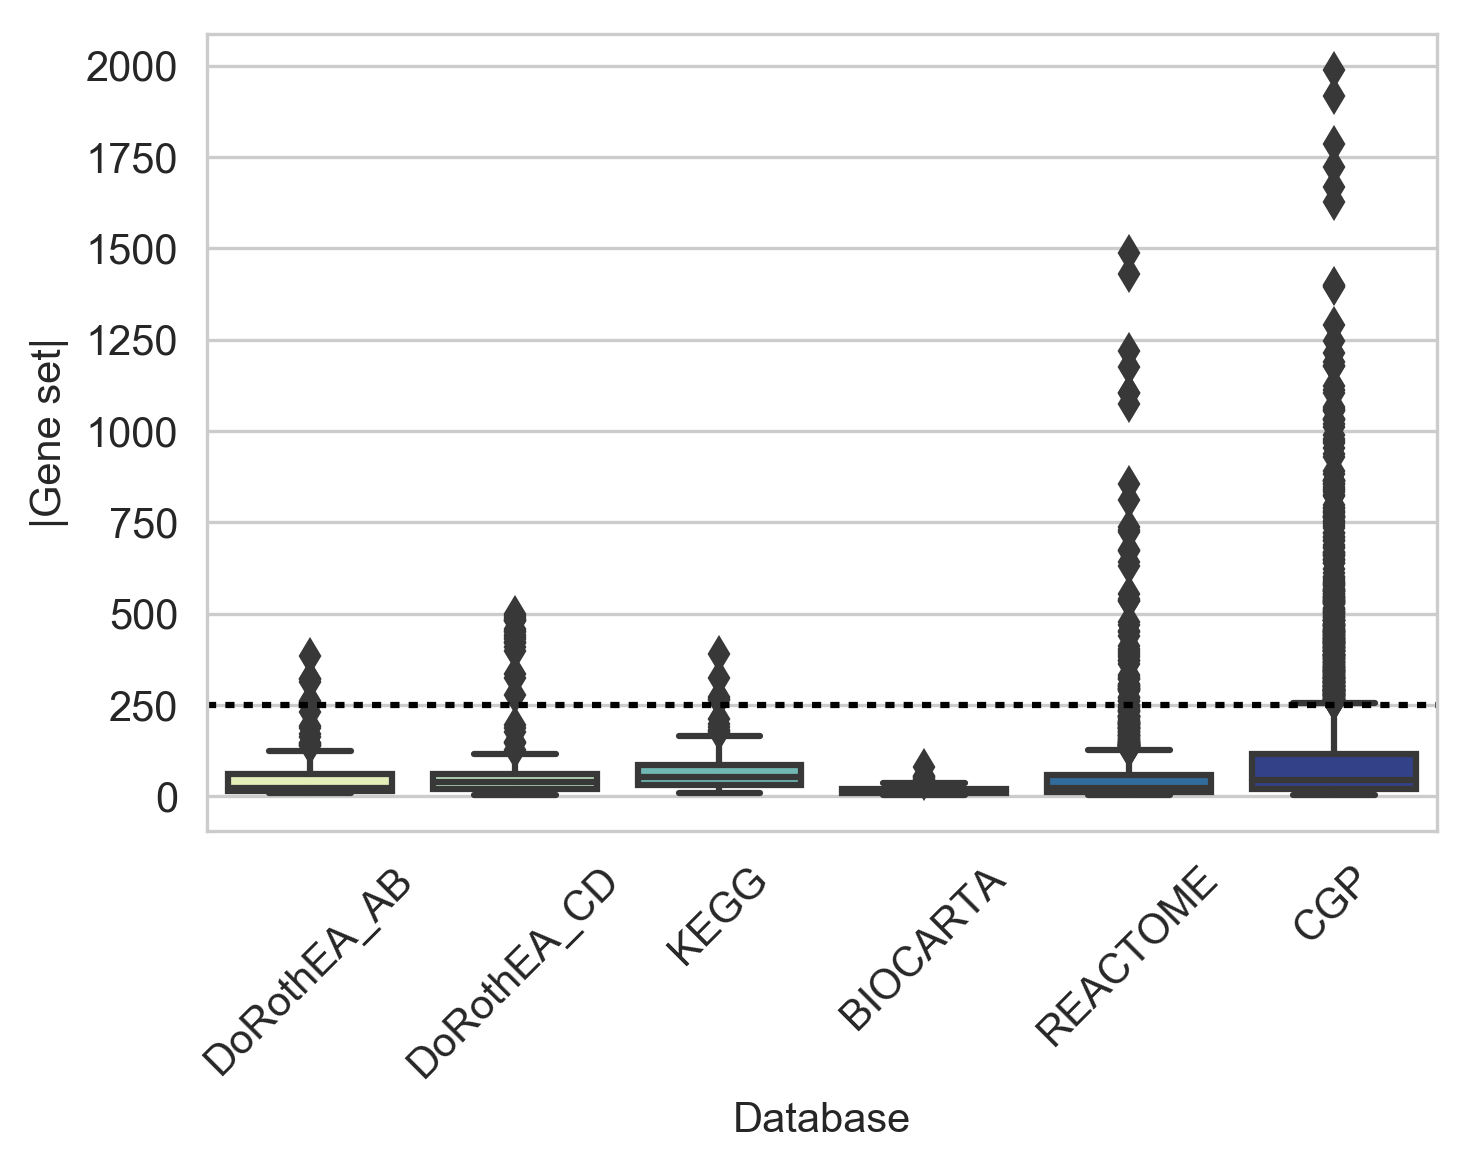

In [6]:
sns.set_palette('YlGnBu',6)
plt.figure(figsize=(5,4),dpi=300)
sns.boxplot(y='Set',x='Database',data=gene_set_sizes)
plt.plot([-0.5,5.5],[250,250],':k')
plt.ylabel('|Gene set|')
plt.xticks(range(6),['DoRothEA_AB','DoRothEA_CD','KEGG','BIOCARTA','REACTOME','CGP'],rotation=45)
plt.tight_layout()
plt.savefig('../figures/raw/SFig1.pdf')

#### Gene set similarity matrix example

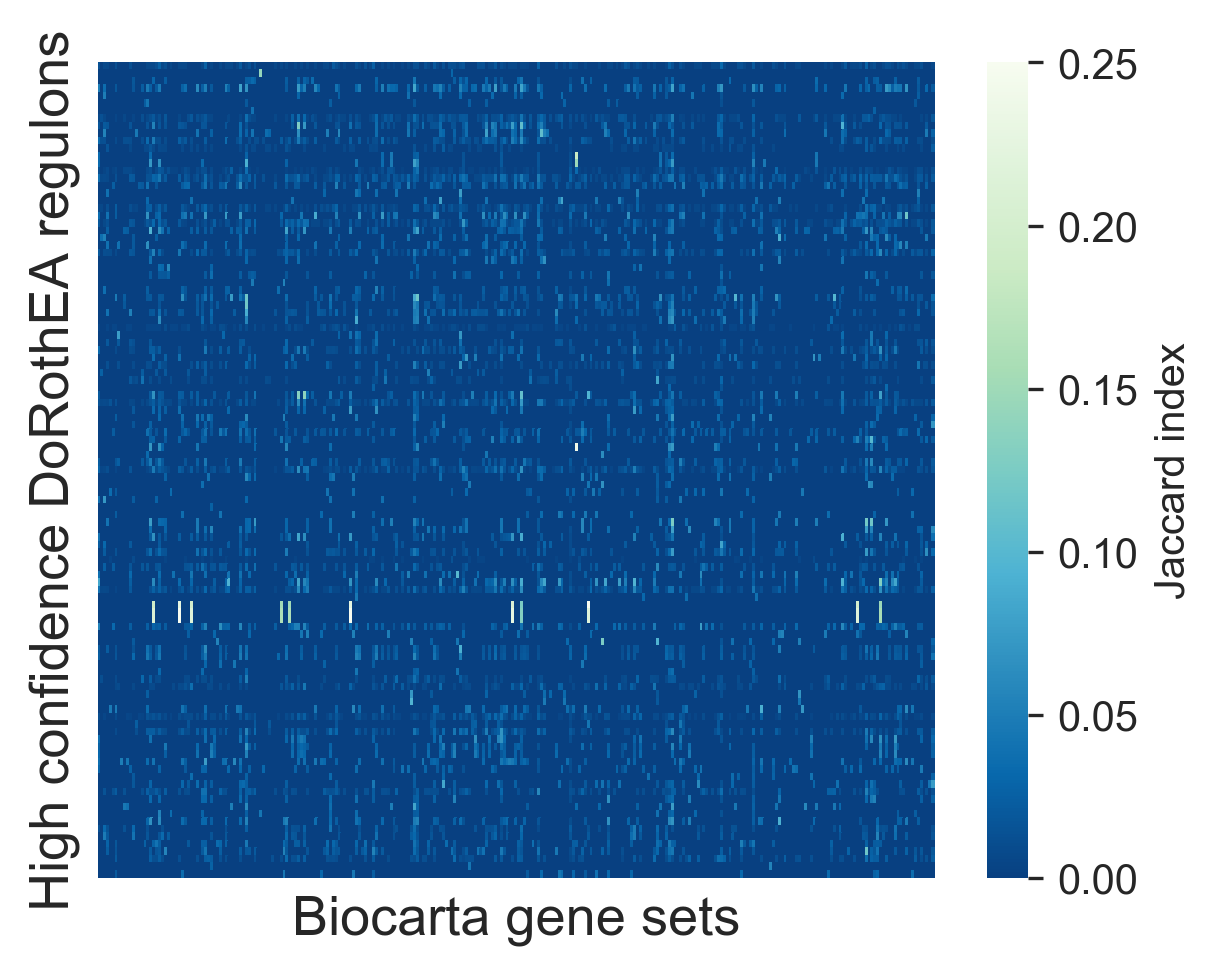

In [28]:
data=pd.read_csv('../results/similarity/BEST_dorothea_AB_filtered_BIOCARTA_filtered_jaccard.csv',
                 sep=',',header=0,index_col=0)
plt.figure(figsize=(4.5,3.6),dpi=300)
sns.heatmap(data,cmap='GnBu_r',cbar_kws={'label': 'Jaccard index'})
plt.xticks([])
plt.yticks([])
plt.xlabel('Biocarta gene sets', size=13)
plt.ylabel('High confidence DoRothEA regulons', size=13)
plt.savefig('../figures/raw/Fig2A.png')

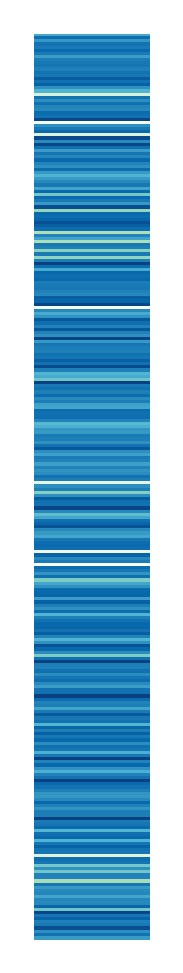

In [29]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(0)),cmap='GnBu_r',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai1.pdf')

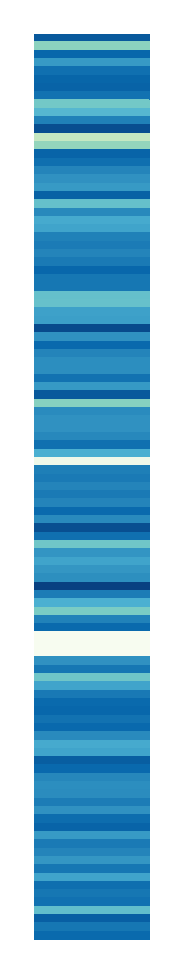

In [30]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(1)),cmap='GnBu_r',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai2.pdf')

#### Similarity to Dorothea

In [31]:
def make_similarity_distribution(fname,dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=False):
    similarities=pd.DataFrame(columns=['Database','Similarity','Random'])
    for dname2 in ['KEGG','BIOCARTA','REACTOME','CGP']:
        #readl
        data=pd.read_csv('../results/similarity/%s_filtered_%s_filtered_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim1=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim1['Database']=dname2
        max_sim1['Similarity']=data
        max_sim1['Random']='Actual gene set'
        similarities=pd.concat([similarities,max_sim1])
        #random
        data=pd.read_csv('../results/similarity/%s_random_uniform_0_%s_random_uniform_0_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim2=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim2['Database']=dname2
        max_sim2['Similarity']=data
        max_sim2['Random']='Random gene set'
        similarities=pd.concat([similarities,max_sim2])

        print(dname1,dname2,mwu(max_sim1['Similarity'],max_sim2['Similarity']))
    sns.set_palette('YlGnBu',2)
    plt.figure(figsize=(4,3),dpi=300)
    similarities.columns = ['Database', 'Similarity', 'Gene set']
    sns.boxplot(x='Database',y='Similarity',hue='Gene set',data=similarities,)
    if metric=='jaccard':
        plt.ylabel('Jaccard index', size=15)
    else:
        plt.ylabel('Overlap coefficient', size=15)
    plt.xlabel('Database', size=15)
    if force_ylim:
        plt.ylim(0,1.0)
    plt.tight_layout()
    if fname:
        plt.savefig('../figures/raw/'+fname)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=1082.5, pvalue=8.764385139750565e-26)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=2107.5, pvalue=9.095751789606195e-17)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1558.5, pvalue=2.4235464466627502e-21)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=656.5, pvalue=3.7525957389100525e-30)


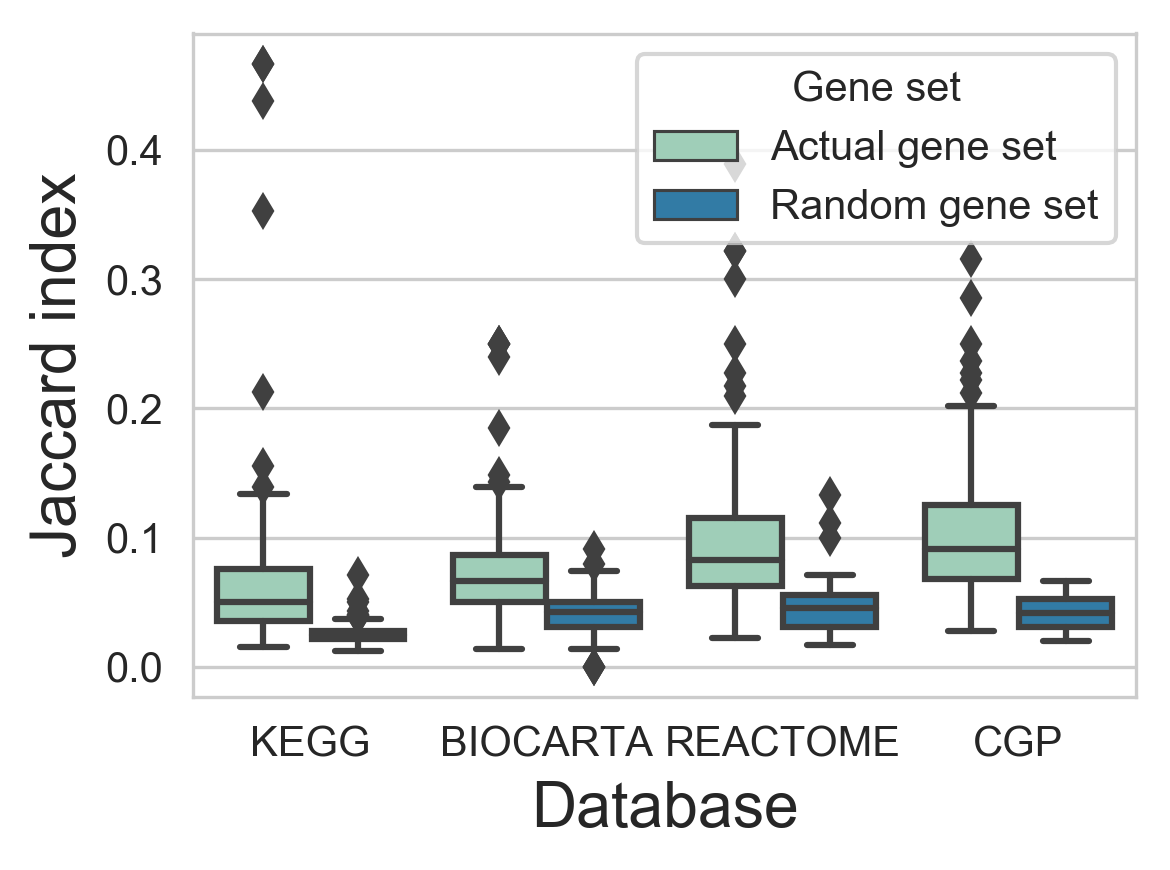

In [32]:
dname1='BEST_dorothea_AB'
metric='jaccard'
make_similarity_distribution('Fig2B.pdf', dname1, metric,)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=1082.5, pvalue=8.764385139750565e-26)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=2107.5, pvalue=9.095751789606195e-17)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1558.5, pvalue=2.4235464466627502e-21)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=656.5, pvalue=3.7525957389100525e-30)


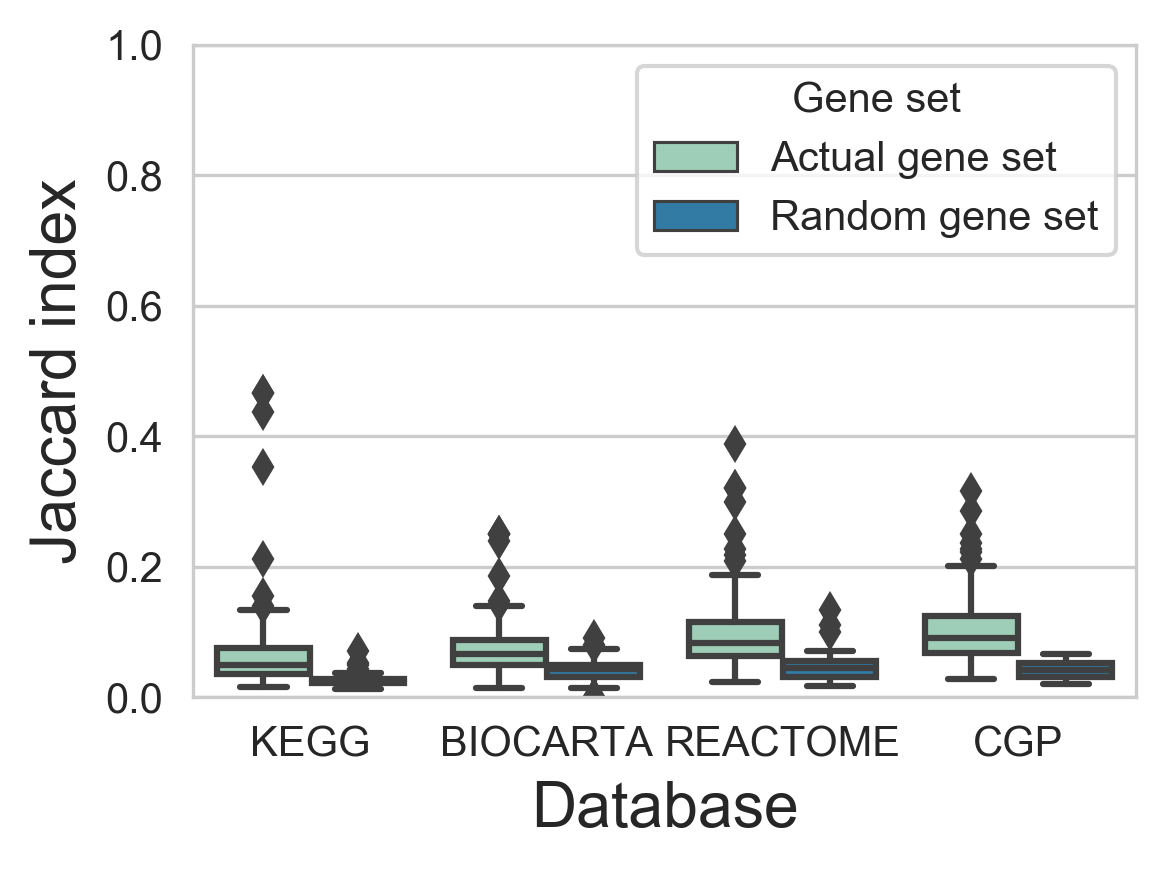

In [33]:
dname1='BEST_dorothea_AB'
metric='jaccard'
make_similarity_distribution('SFig2A.pdf', dname1, metric, True)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=1512.5, pvalue=9.274748284219977e-22)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=2795.0, pvalue=5.853126835388811e-12)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=974.0, pvalue=2.1821460629930427e-27)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=373.0, pvalue=1.633501448883152e-33)


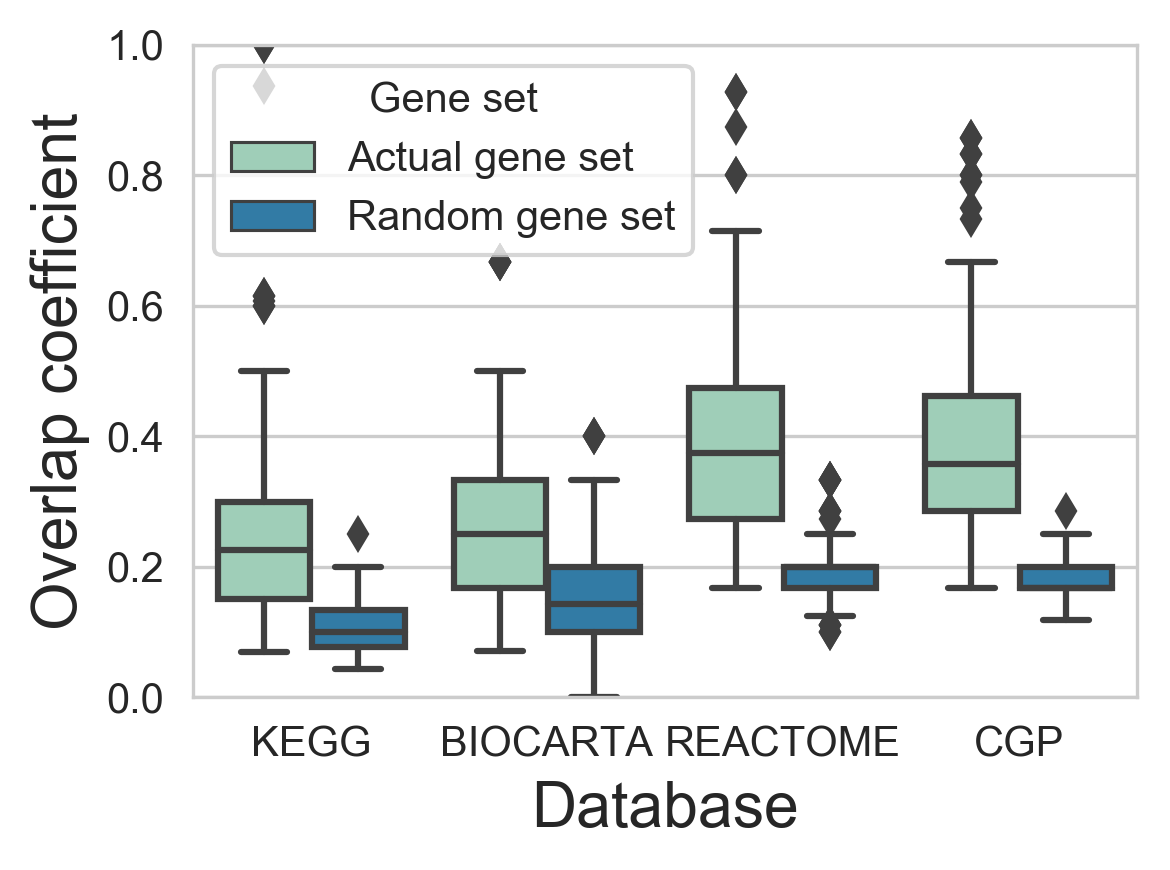

In [34]:
dname1='BEST_dorothea_AB'
metric='overlap'
make_similarity_distribution('SFig2B.pdf', dname1, metric, True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=22564.0, pvalue=7.431356441224042e-08)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=23089.5, pvalue=4.170493535627383e-07)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=22349.0, pvalue=3.5500337831894316e-08)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=14614.0, pvalue=9.258257382511511e-25)


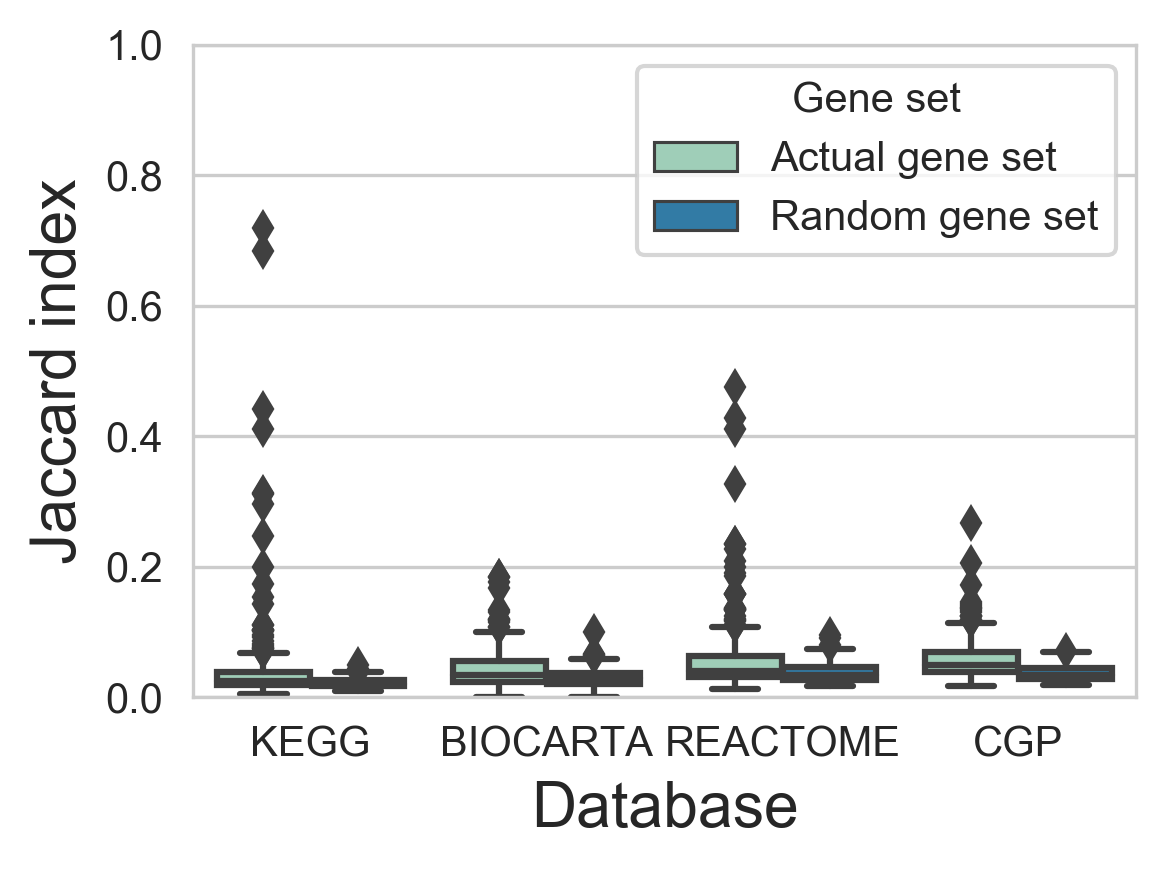

In [35]:
dname1='BEST_dorothea_CD'
metric='jaccard'
make_similarity_distribution('SFig2C.pdf', dname1, metric, True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=23026.5, pvalue=3.3147837960593375e-07)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=18329.0, pvalue=1.0746758293702891e-15)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=18160.5, pvalue=4.295966478369609e-18)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=10616.5, pvalue=2.3973358202286344e-38)


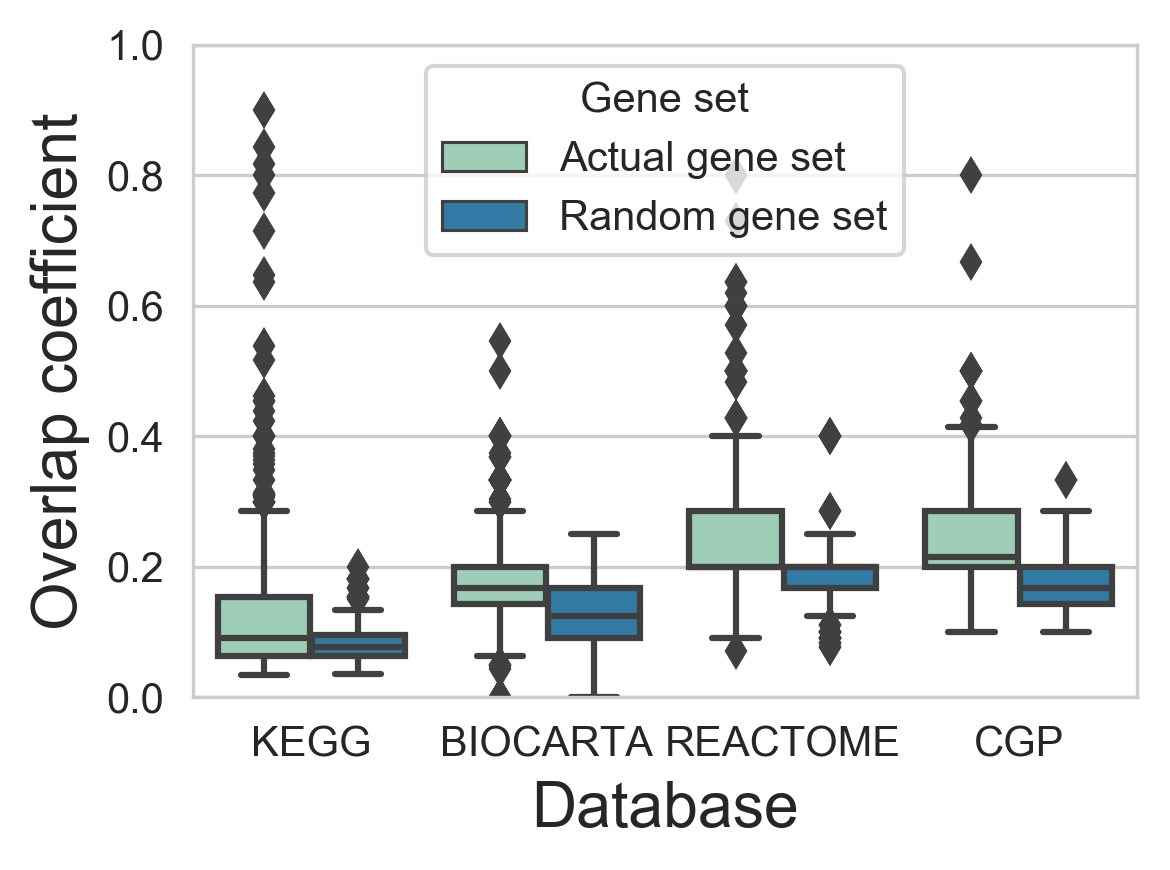

In [36]:
dname1='BEST_dorothea_CD'
metric='overlap'
make_similarity_distribution('SFig2D.pdf', dname1, metric, True)

#### Network distances

In [2]:
DM=pd.read_csv('../data/omnipath/DM_GC.csv',sep=',',header=0,index_col=0)
AM=pd.read_csv('../data/omnipath/AM_GC.csv',sep=',',header=0,index_col=0)

In [3]:
degree=(AM.sum()-1).astype(int)
degree_dict={}
for i in range(1,degree.max()+1):
    fil=degree==i
    degree_dict[i]=degree.index[fil]

In [4]:
def make_distance_distribution(fname,set_name='BEST_DoRothEA_AB',lab_name='DoRothEA'):
    gene_sets=pd.read_csv('../results/genesets/single/csvs/%s_filtered.csv' % set_name,
                          sep=',',header=0,index_col=0)
    #overlap with DM
    fil=np.in1d(gene_sets['Gene'],DM.index)
    gene_sets=gene_sets[fil]
    distances=[]
    bg=[]
    for gene_set in gene_sets['Set'].unique():
        fil=gene_sets['Set']==gene_set
        genes=gene_sets[fil]['Gene'].unique()
        if len(genes)>1:
            distances+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
            degree_counts=degree[genes].value_counts()
            genes=[]
            for d in degree_counts.index:
                genes+=list(np.random.choice(degree_dict[d],degree_counts[d],False))
            bg+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
    plt.figure(figsize=(4,3),dpi=300)
    sns.set_palette('YlGnBu',3)
    plt.hist([DM.values[np.triu_indices_from(DM,1)],bg,distances],normed=True)
    plt.xlabel('Shortest path distance', size=15)
    plt.ylabel('Density', size=15)
    plt.xlim(1,10)
    plt.legend(['all distances','degree matched background',lab_name+ ' distances'])
    plt.tight_layout()
    plt.savefig('../figures/raw/'+fname)
    print('p value vs. all distances:',mwu(DM.values[np.triu_indices_from(DM,1)],distances))
    print('p value vs. bg distances:',mwu(bg,distances))

p value vs. all distances: MannwhitneyuResult(statistic=1475379552458.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9573273646.5, pvalue=0.0)


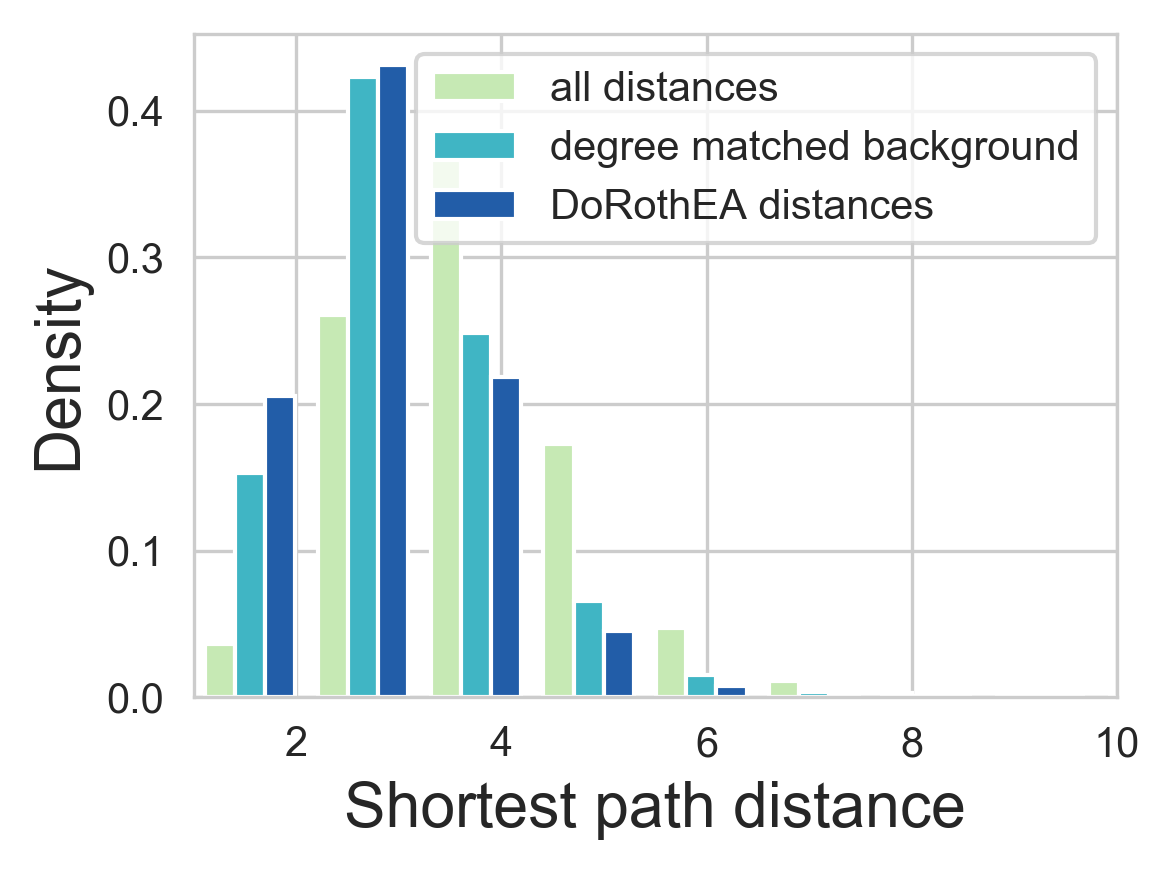

In [5]:
make_distance_distribution('Fig2C.pdf')

p value vs. all distances: MannwhitneyuResult(statistic=1475379552458.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9612691956.5, pvalue=0.0)


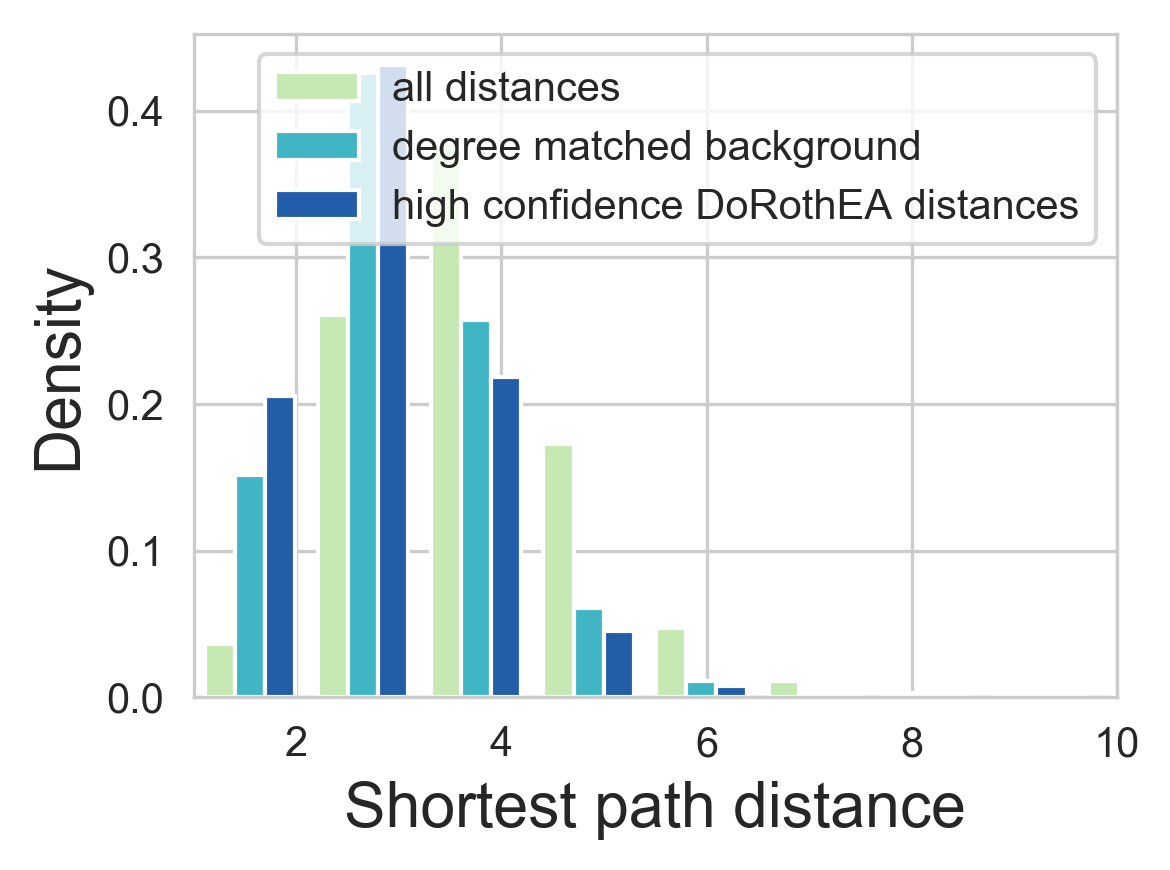

In [6]:
make_distance_distribution('SFig3A.pdf',set_name='BEST_DoRothEA_AB',lab_name='high confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=1880838589477.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8606953120.0, pvalue=0.0)


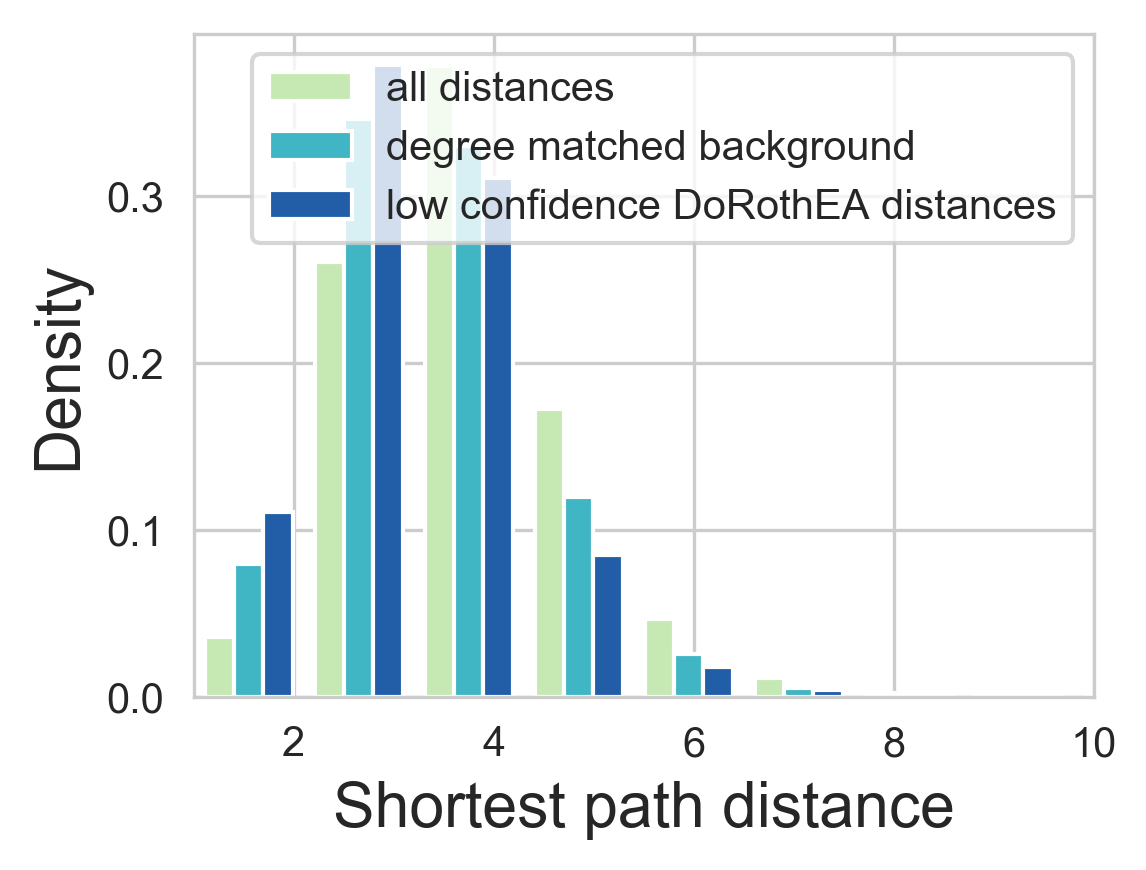

In [7]:
make_distance_distribution('SFig3B.pdf',set_name='BEST_DoRothEA_CD',lab_name='low confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=3003409588589.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=55234136488.5, pvalue=0.0)


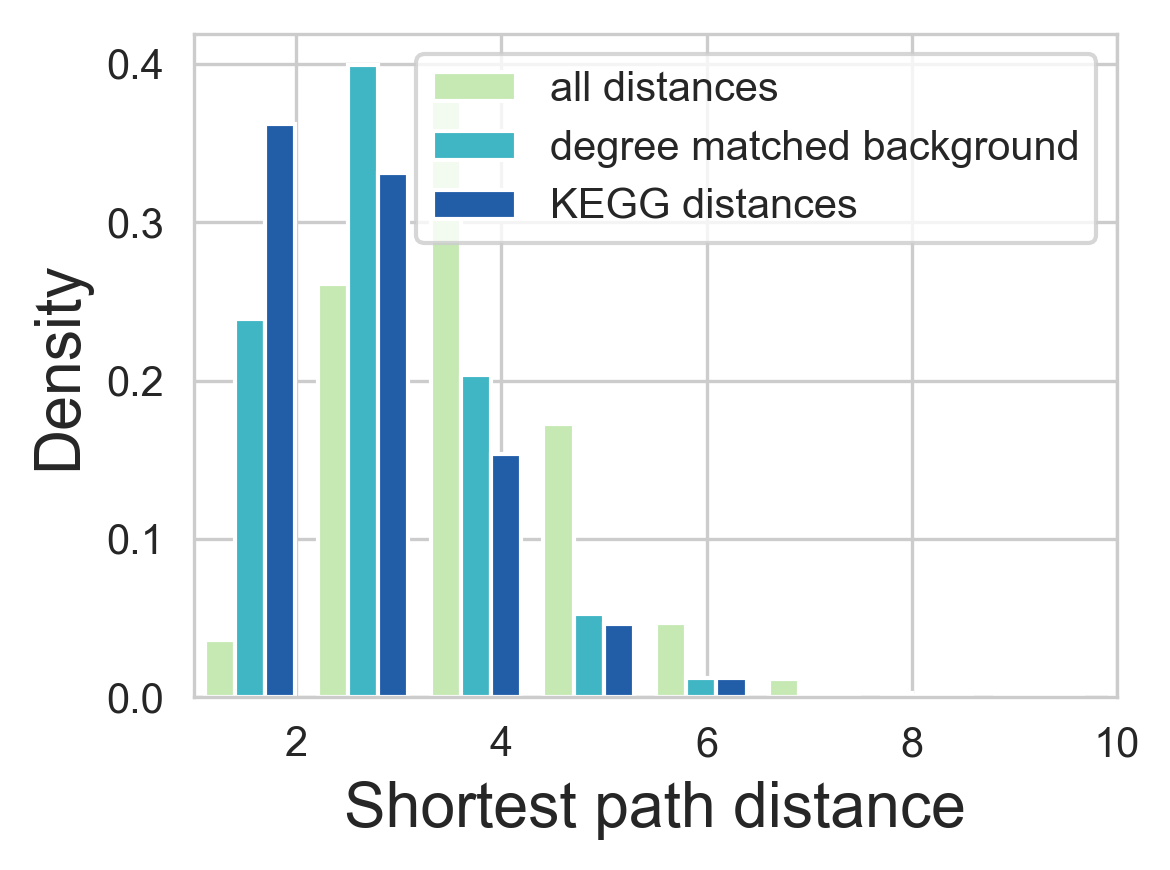

In [8]:
make_distance_distribution('SFig3C.pdf',set_name='KEGG',lab_name='KEGG')

p value vs. all distances: MannwhitneyuResult(statistic=148361507585.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=825058749.5, pvalue=0.0)


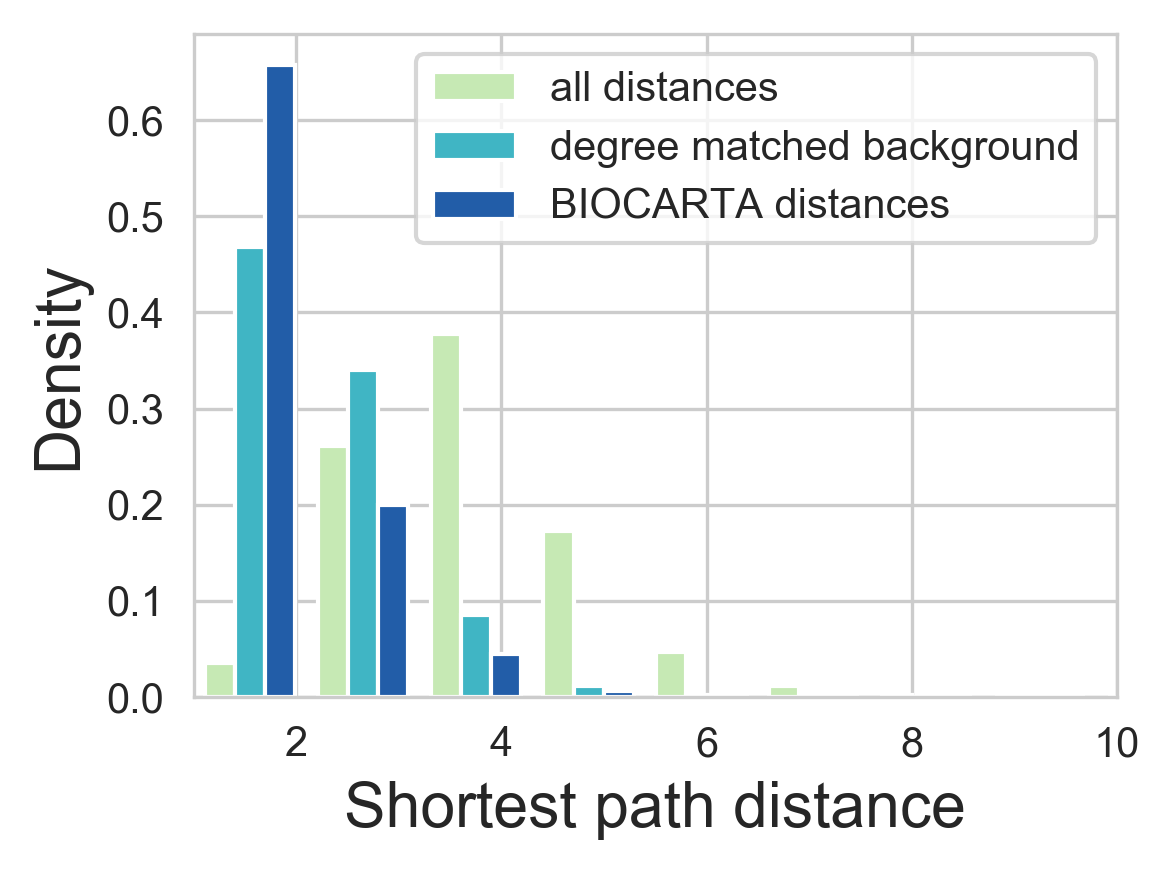

In [9]:
make_distance_distribution('SFig3D.pdf',set_name='BIOCARTA',lab_name='BIOCARTA')

p value vs. all distances: MannwhitneyuResult(statistic=12791962372436.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=790758647322.5, pvalue=0.0)


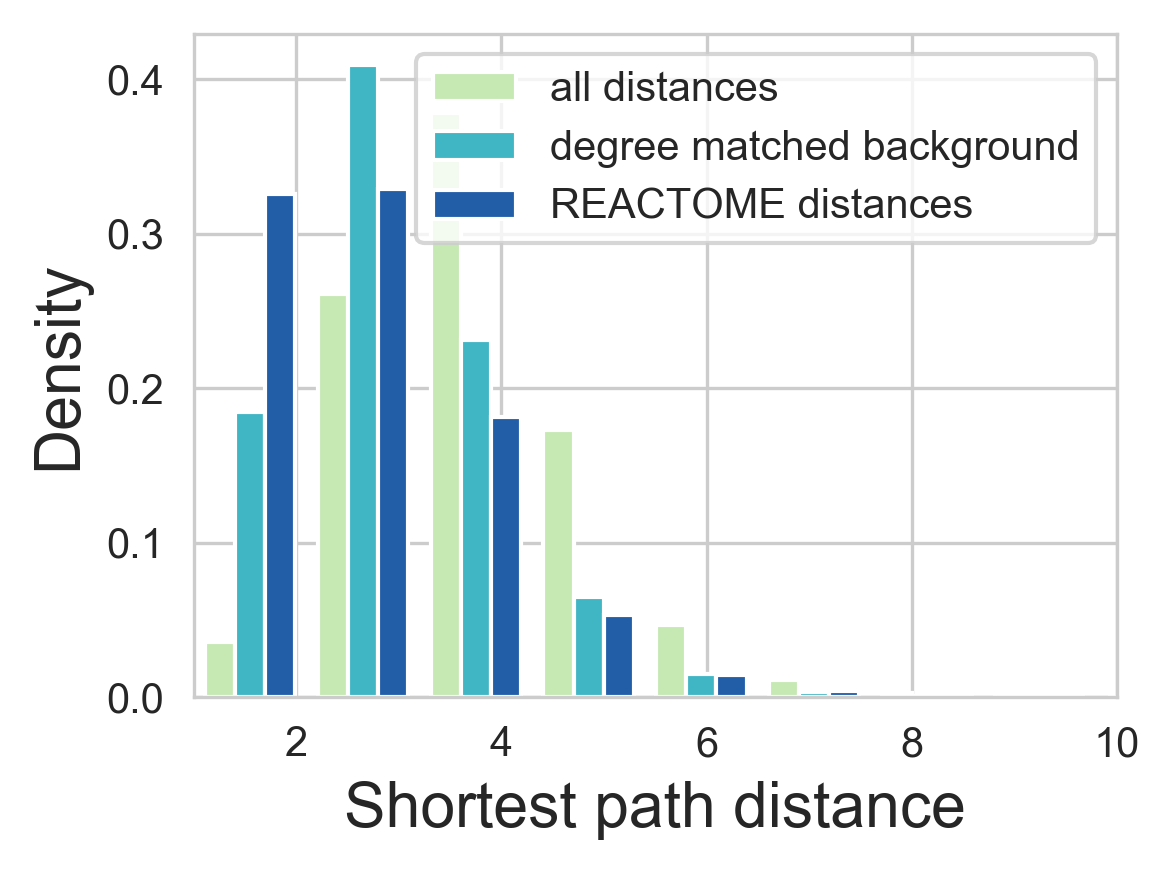

In [10]:
make_distance_distribution('SFig3E.pdf',set_name='REACTOME',lab_name='REACTOME')

p value vs. all distances: MannwhitneyuResult(statistic=62144920767192.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8492708346979.0, pvalue=0.0)


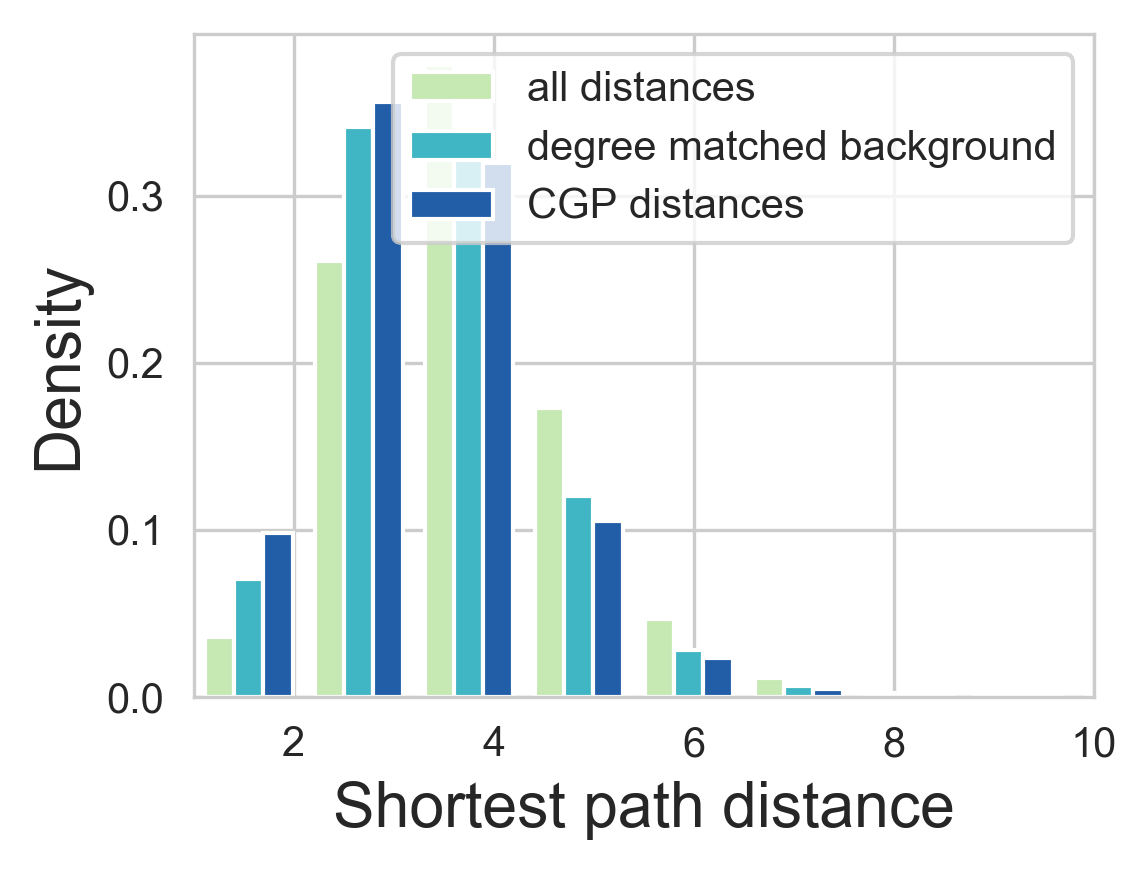

In [11]:
make_distance_distribution('SFig3F.pdf',set_name='CGP',lab_name='CGP')